In [1]:
import os
import sys
sys.path.append('/kaggle/input/raft-pytorch')
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch

from glob import glob
from PIL import Image
from tqdm import tqdm

In [2]:
from raft.core.raft import RAFT
from raft.core.utils import flow_viz
from raft.core.utils.utils import InputPadder
from raft.config import RAFTConfig

In [3]:
config = RAFTConfig(
    dropout=0,
    alternate_corr=False,
    small=False,
    mixed_precision=False
)

model = RAFT(config)
model

RAFT(
  (fnet): BasicEncoder(
    (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=Fa

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

weights_path = '/kaggle/input/raft-pytorch/raft-sintel.pth'
# weights_path = '/kaggle/input/raft-pytorch/raft-things.pth'

ckpt = torch.load(weights_path, map_location=device)
model.to(device)
model.load_state_dict(ckpt)

device: cuda


/tmp/ipykernel_30/2399147103.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(weights_path, map_location=device)


<All keys matched successfully>

In [5]:
image_files = glob('/kaggle/input/mpi-sintel-dataset/training/final/temple_2/*.png')
image_files = sorted(image_files)

print(f'Found {len(image_files)} images')
print(sorted(image_files))

Found 50 images
['/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0001.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0002.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0003.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0004.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0005.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0006.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0007.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0008.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0009.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0010.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0011.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0012.png', '/kaggle/input/mpi-sintel-dataset/training/final/temple_2/frame_0013.png', '/kaggle

In [6]:
def load_image(imfile, device):
    img = np.array(Image.open(imfile)).astype(np.uint8)
    img = torch.from_numpy(img).permute(2, 0, 1).float()
    return img[None].to(device)


def viz(img1, img2, flo):
    img1 = img1[0].permute(1,2,0).cpu().numpy()
    img2 = img2[0].permute(1,2,0).cpu().numpy()
    flo = flo[0].permute(1,2,0).cpu().numpy()
    
    # map flow to rgb image
    flo = flow_viz.flow_to_image(flo)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    ax1.set_title('input image1')
    ax1.imshow(img1.astype(int))
    ax2.set_title('input image2')
    ax2.imshow(img2.astype(int))
    ax3.set_title('estimated optical flow')
    ax3.imshow(flo)
    plt.show()

0it [00:00, ?it/s]/kaggle/input/raft-pytorch/raft/core/raft.py:99: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):
/kaggle/input/raft-pytorch/raft/core/raft.py:110: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):
/opt/conda/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/kaggle/input/raft-pytorch/raft/core/raft.py:127: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self

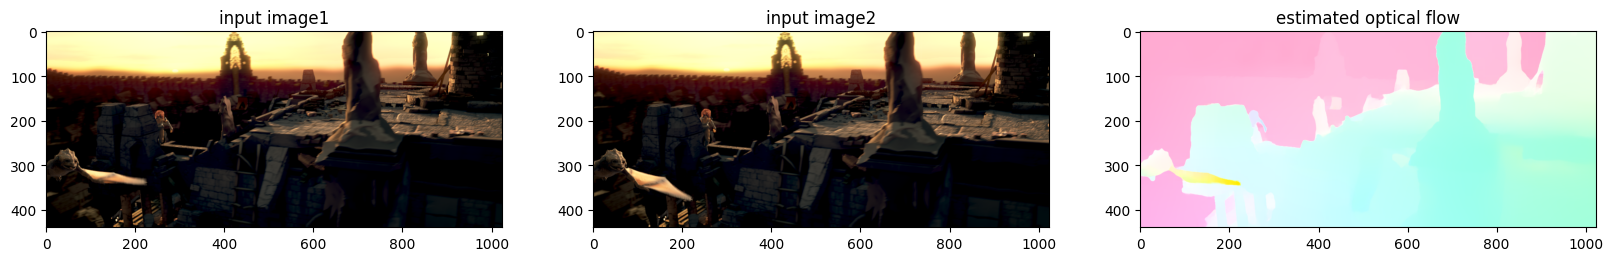

1it [00:02,  2.01s/it]

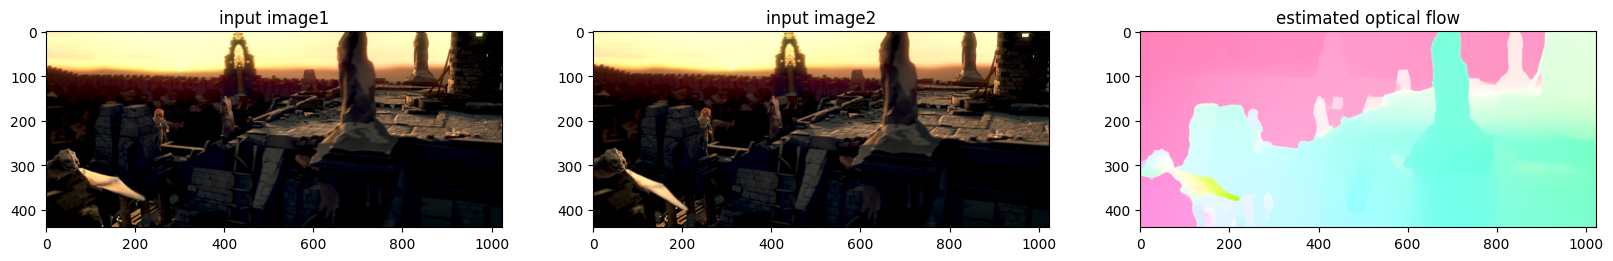

2it [00:03,  1.49s/it]

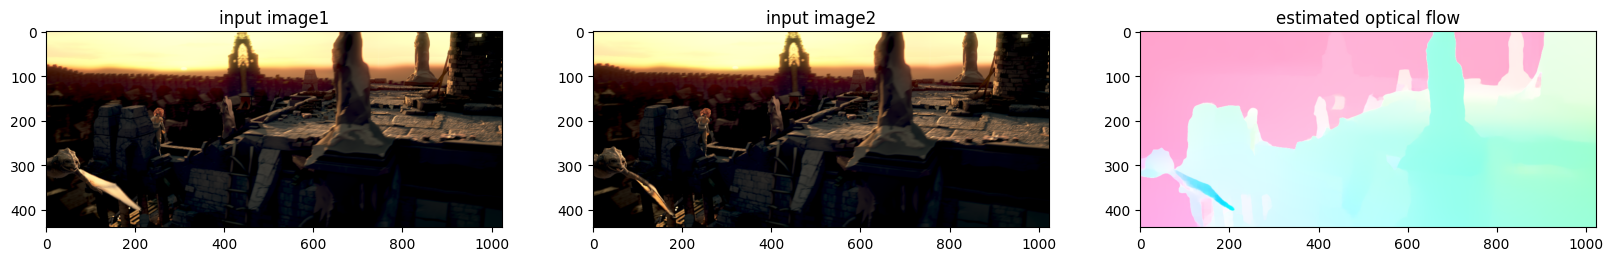

3it [00:04,  1.30s/it]

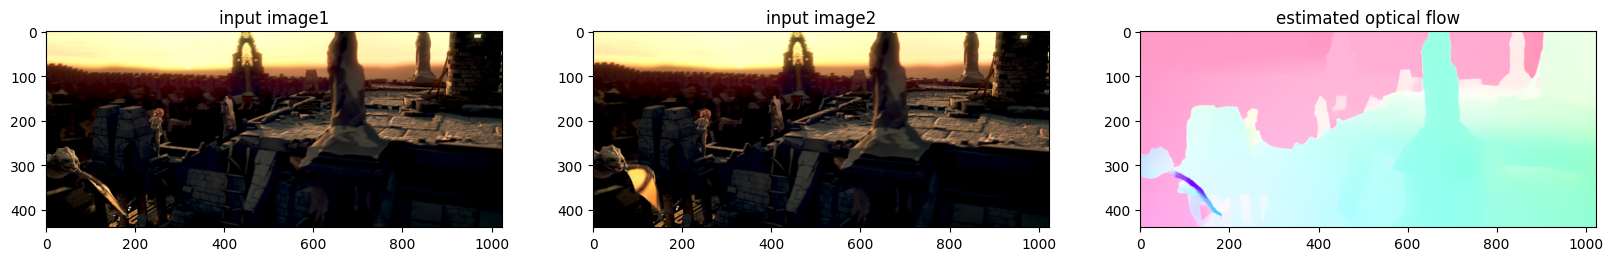

4it [00:05,  1.22s/it]

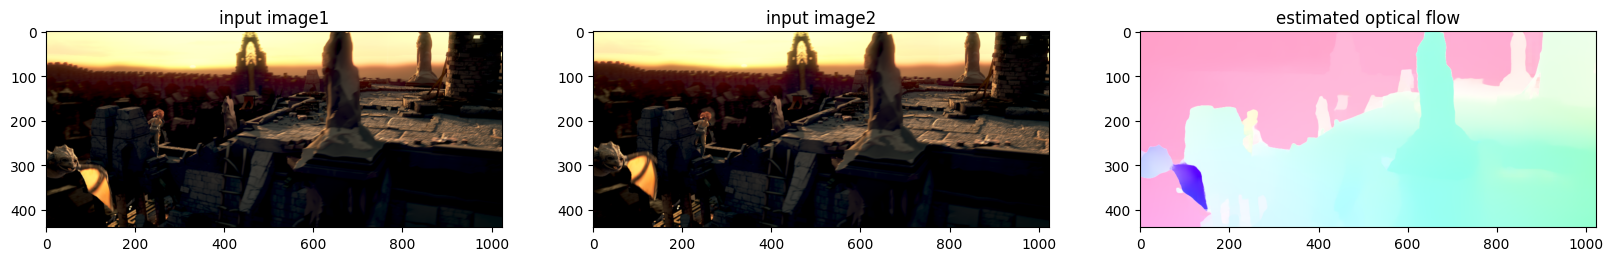

5it [00:06,  1.16s/it]

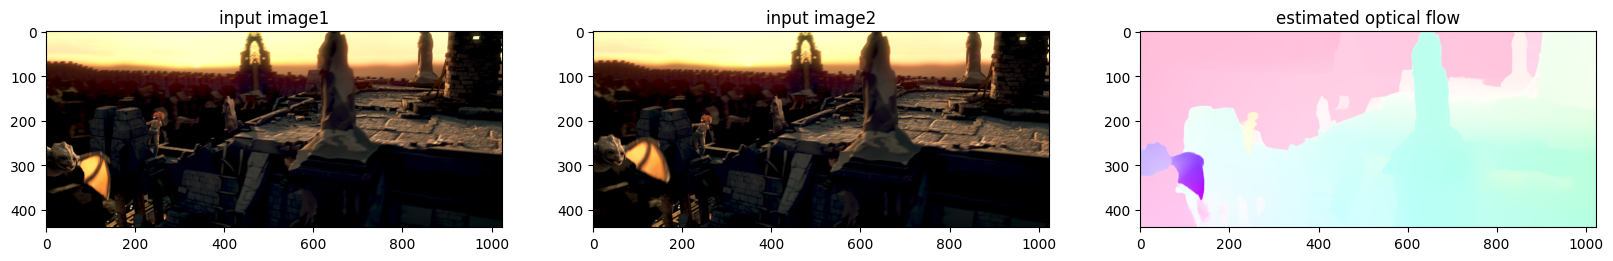

6it [00:07,  1.12s/it]

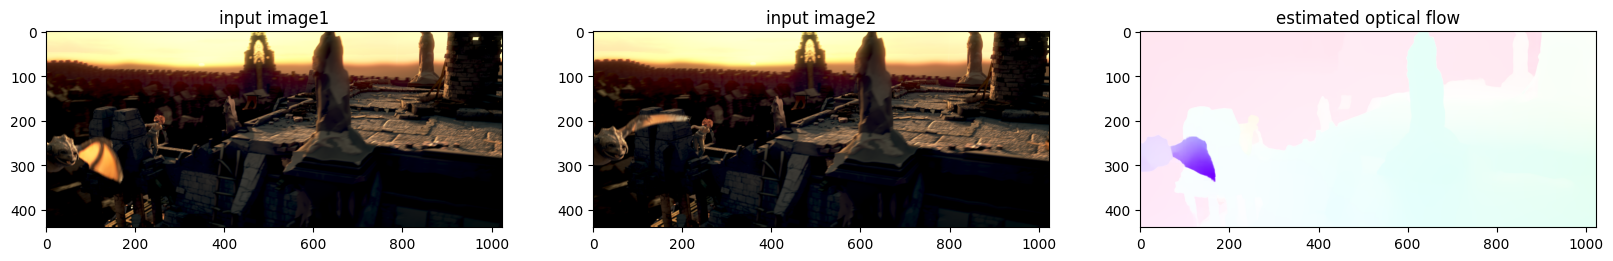

7it [00:08,  1.12s/it]

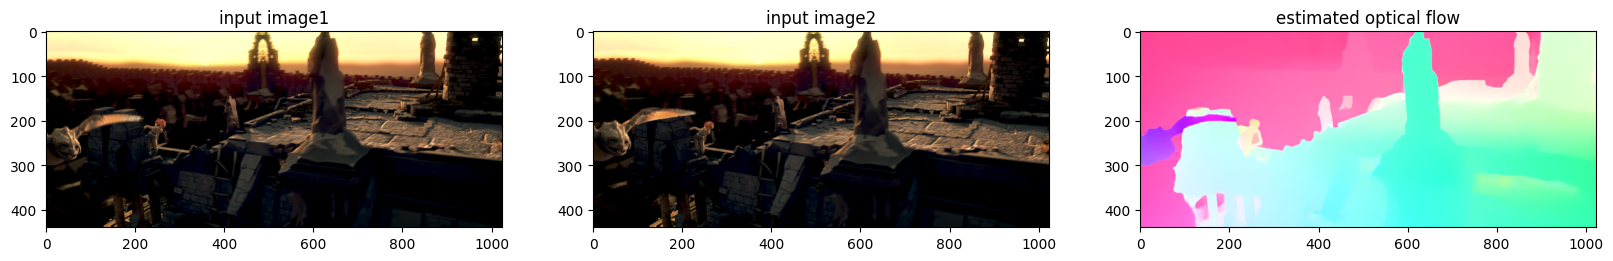

8it [00:09,  1.13s/it]

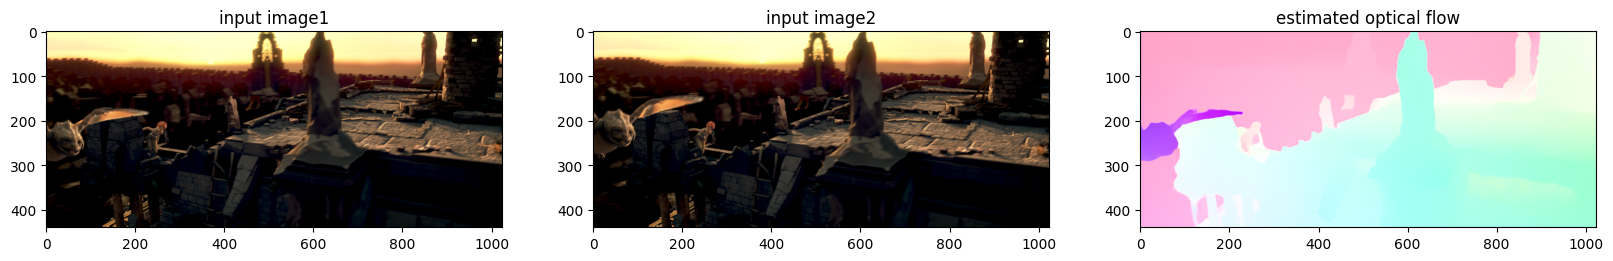

9it [00:10,  1.09s/it]

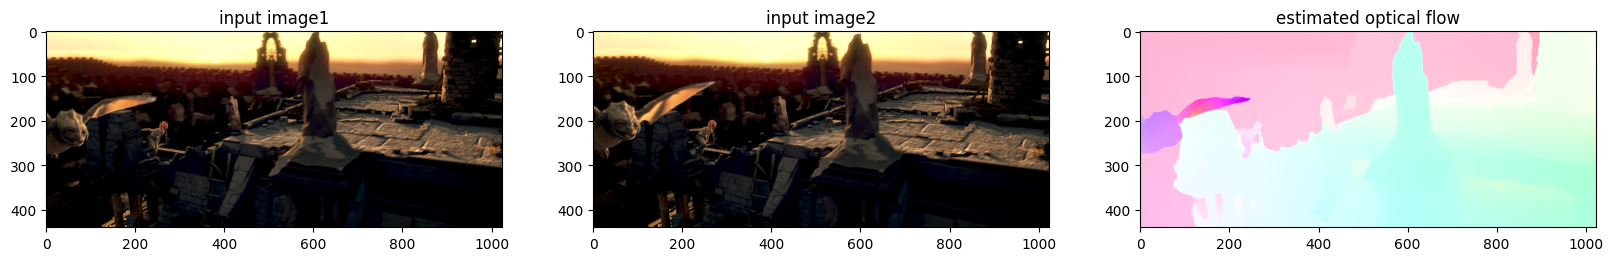

10it [00:11,  1.18s/it]


In [7]:
model.eval()
n_vis = 10

for file1, file2 in tqdm(zip(image_files[:n_vis], image_files[1:1+n_vis])):
    image1 = load_image(file1, device)
    image2 = load_image(file2, device)

    padder = InputPadder(image1.shape)
    image1, image2 = padder.pad(image1, image2)
    
    with torch.no_grad():
        flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
        
    viz(image1, image2, flow_up)

frame shape: (50, 436, 1024, 3)


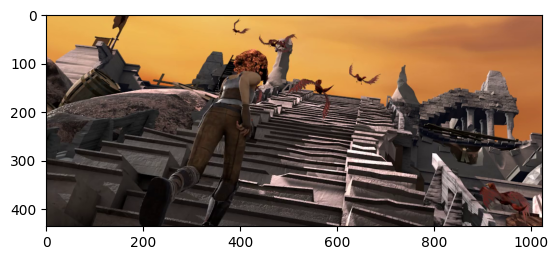

In [8]:
video_file = '/kaggle/input/video-dataset/temple_clean.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while True:
    has_frame, image = cap.read()
    
    if has_frame:
        image = image[:, :, ::-1] # convert BGR -> RGB
        frames.append(image)
    else:
        break
frames = np.stack(frames, axis=0)

print(f'frame shape: {frames.shape}')    
plt.imshow(frames[0])

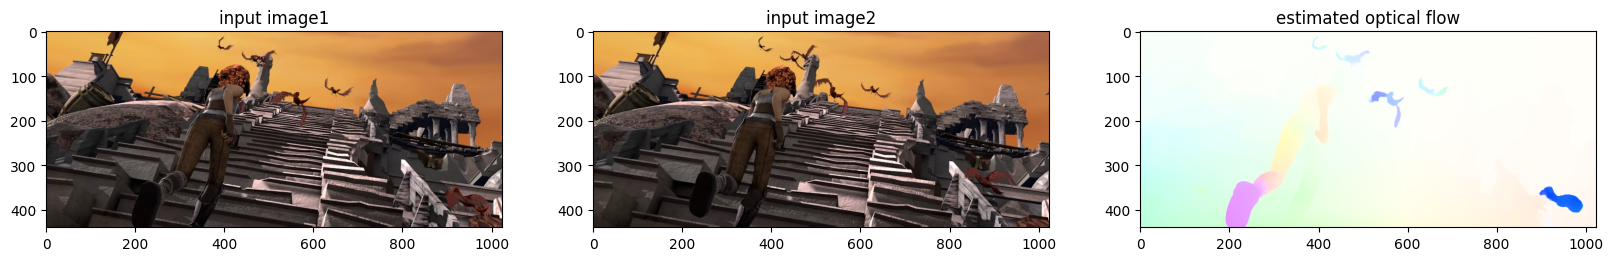

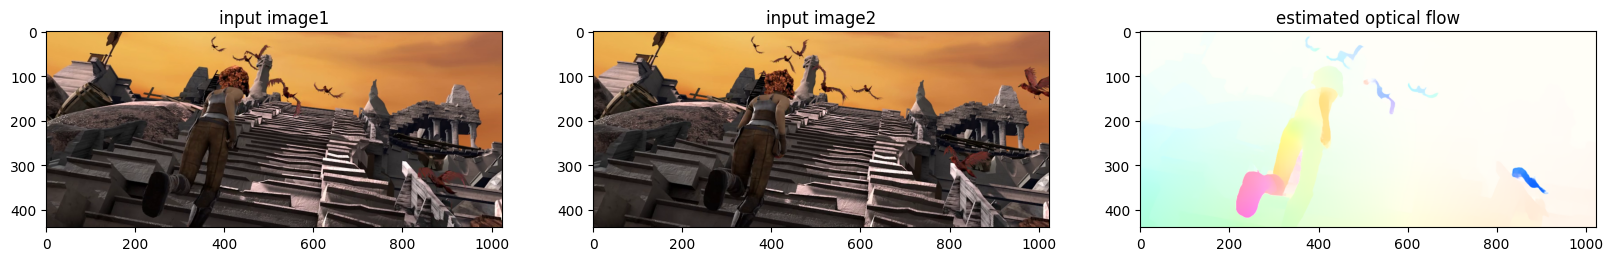

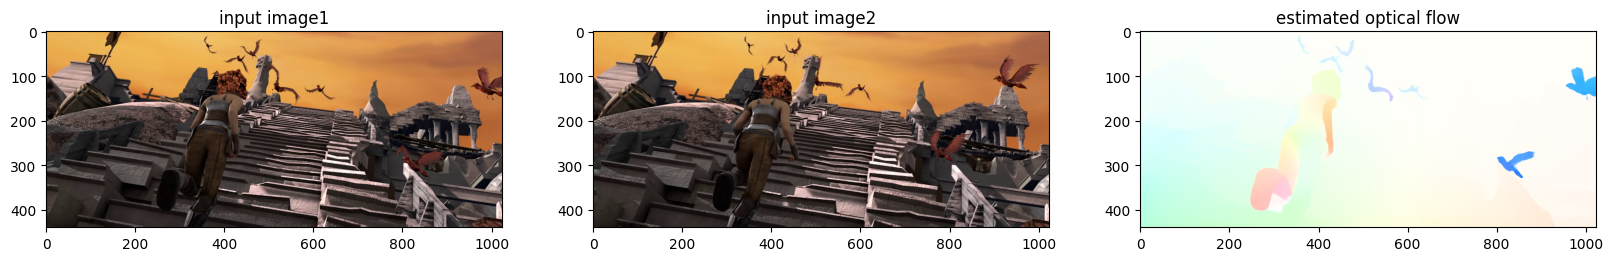

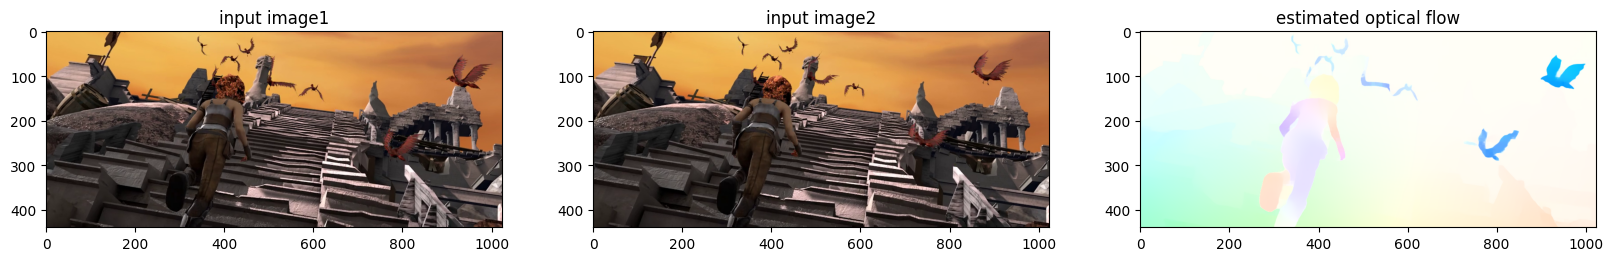

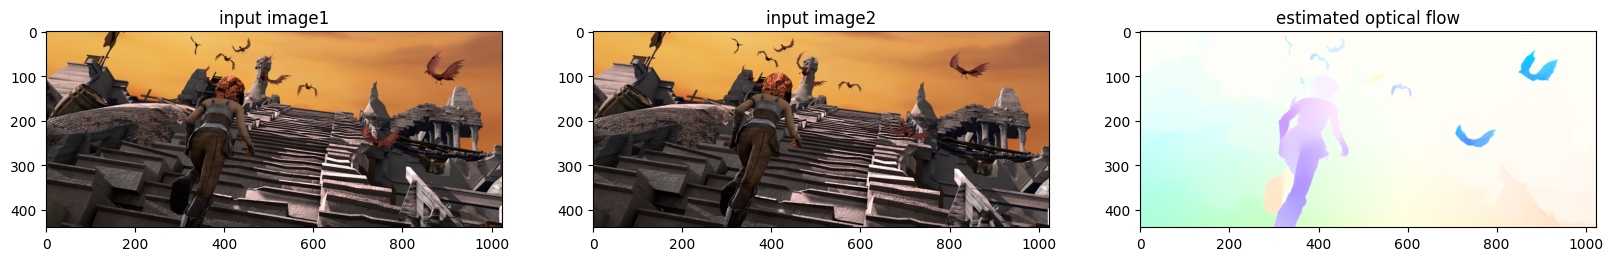

In [9]:
n_vis =5

for i in range(n_vis):
    image1 = torch.from_numpy(frames[i]).permute(2, 0, 1).float().to(device)
    image2 = torch.from_numpy(frames[i+1]).permute(2, 0, 1).float().to(device)
    
    image1 = image1[None].to(device)
    image2 = image2[None].to(device)

    padder = InputPadder(image1.shape)
    image1, image2 = padder.pad(image1, image2)
    
    with torch.no_grad():
        flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
        
    viz(image1, image2, flow_up)

Frame shape: (50, 436, 1024, 3)
Saved optical flow image optical_flow_images3/flow_000.png
Saved optical flow image optical_flow_images3/flow_001.png
Saved optical flow image optical_flow_images3/flow_002.png
Saved optical flow image optical_flow_images3/flow_003.png
Saved optical flow image optical_flow_images3/flow_004.png
Saved optical flow image optical_flow_images3/flow_005.png
Saved optical flow image optical_flow_images3/flow_006.png
Saved optical flow image optical_flow_images3/flow_007.png
Saved optical flow image optical_flow_images3/flow_008.png
Saved optical flow image optical_flow_images3/flow_009.png
Saved optical flow image optical_flow_images3/flow_010.png
Saved optical flow image optical_flow_images3/flow_011.png
Saved optical flow image optical_flow_images3/flow_012.png
Saved optical flow image optical_flow_images3/flow_013.png
Saved optical flow image optical_flow_images3/flow_014.png
Saved optical flow image optical_flow_images3/flow_015.png
Saved optical flow image

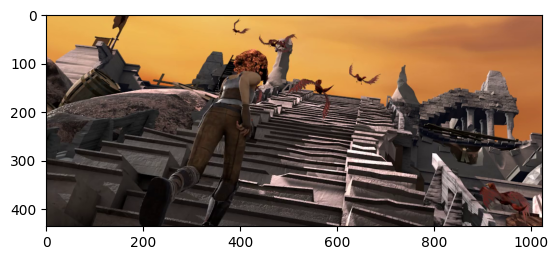

In [10]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Path to the video file
video_file = '/kaggle/input/video-dataset/temple_clean.mp4'

# Check if the file has a valid video extension
valid_extensions = ['.mp4', '.avi', '.mov']
if not any(video_file.endswith(ext) for ext in valid_extensions):
    raise ValueError(f"Unsupported file extension. Please use one of the following: {valid_extensions}")

# Load the video
cap = cv2.VideoCapture(video_file)

# Initialize frames list
frames = []
while True:
    has_frame, image = cap.read()
    if has_frame:
        image = image[:, :, ::-1]  # Convert BGR to RGB
        frames.append(image)
    else:
        break

if len(frames) == 0:
    raise ValueError("No frames were loaded from the video. Please check the file path or format.")

frames = np.stack(frames, axis=0)

print(f'Frame shape: {frames.shape}')    
plt.imshow(frames[0])

# Number of frames to process for optical flow
n_vis = min(180, len(frames))  # Adjust n_vis to the number of frames if fewer than 180

# Create directory to save output images
output_dir = 'optical_flow_images3'
os.makedirs(output_dir, exist_ok=True)

for i in range(n_vis - 1):  # Adjust range to avoid index out of bounds for the last frame
    image1 = torch.from_numpy(frames[i]).permute(2, 0, 1).float().to(device)
    image2 = torch.from_numpy(frames[i + 1]).permute(2, 0, 1).float().to(device)
    
    image1 = image1[None].to(device)
    image2 = image2[None].to(device)

    # Pad the images
    padder = InputPadder(image1.shape)
    image1, image2 = padder.pad(image1, image2)
    
    # Estimate optical flow
    with torch.no_grad():
        flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
    
    # Check for valid flow output
    if flow_up is None or flow_up.numel() == 0:
        print(f"Flow at index {i} is empty.")
        continue
    
    # Convert flow to a format suitable for visualization
    flow_up = flow_up[0].cpu().numpy().transpose(1, 2, 0)  # Convert to HxWx2 format
    
    if np.isnan(flow_up).any() or np.isinf(flow_up).any():
        print(f"Flow at index {i} contains NaN or Inf values.")
        continue
    
    # Normalize flow for visualization
    magnitude, angle = cv2.cartToPolar(flow_up[..., 0], flow_up[..., 1])
    
    # Initialize a 3-channel image for HSV (same resolution as input frames)
    flow_vis = np.zeros((flow_up.shape[0], flow_up.shape[1], 3), dtype=np.uint8)
    
    # Flow visualization: Hue (direction), Saturation (intensity), and Value (magnitude)
    flow_vis[..., 0] = (angle * 180 / np.pi) / 2  # Hue (direction)
    flow_vis[..., 1] = 255  # Saturation (maximum intensity)
    flow_vis[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)  # Value (magnitude)
    
    # Convert HSV to RGB and normalize between 0 to 255
    flow_vis = cv2.cvtColor(flow_vis, cv2.COLOR_HSV2BGR)
    flow_vis = np.clip(flow_vis, 0, 255).astype(np.uint8)  # Ensure valid RGB values
    
    # Save the flow image to the output directory
    flow_filename = os.path.join(output_dir, f'flow_{i:03d}.png')
    cv2.imwrite(flow_filename, flow_vis)
    print(f'Saved optical flow image {flow_filename}')

In [11]:
import cv2
import os
import numpy as np

# Path to the output directory where flow images are stored
output_dir = 'optical_flow_images3'

# Video settings
video_filename = 'optical.mp4'  # Output video file
fps = 30  # Frames per second for the video

# Get sorted list of flow image files
flow_files = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])

# Verify the list is not empty
if not flow_files:
    raise FileNotFoundError(f"No PNG files found in directory: {output_dir}")

# Read the first image to get the resolution
first_frame_path = os.path.join(output_dir, flow_files[0])
first_frame = cv2.imread(first_frame_path)


if first_frame is None:
    raise ValueError(f"Failed to read the first frame: {first_frame_path}")

height, width, _ = first_frame.shape

# Initialize VideoWriter with the desired settings
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # MP4 codec
out_video = cv2.VideoWriter(video_filename, fourcc, fps, (width, height))

# Write each flow image to the video
for flow_file in flow_files:
    flow_path = os.path.join(output_dir, flow_file)
    flow_image = cv2.imread(flow_path)
    
    if flow_image is not None:
        # Clip RGB values to ensure they remain in the valid range (optional safety check)
        flow_image = np.clip(flow_image, 0, 255).astype(np.uint8)
        out_video.write(flow_image)  # Write the frame
        print(f'Added frame {flow_file} to video')
    else:
        print(f'Failed to read {flow_file}, skipping...')

# Release the video writer
out_video.release()
print(f'Video saved as {video_filename}')

Added frame flow_000.png to video
Added frame flow_001.png to video
Added frame flow_002.png to video
Added frame flow_003.png to video
Added frame flow_004.png to video
Added frame flow_005.png to video
Added frame flow_006.png to video
Added frame flow_007.png to video
Added frame flow_008.png to video
Added frame flow_009.png to video
Added frame flow_010.png to video
Added frame flow_011.png to video
Added frame flow_012.png to video
Added frame flow_013.png to video
Added frame flow_014.png to video
Added frame flow_015.png to video
Added frame flow_016.png to video
Added frame flow_017.png to video
Added frame flow_018.png to video
Added frame flow_019.png to video
Added frame flow_020.png to video
Added frame flow_021.png to video
Added frame flow_022.png to video
Added frame flow_023.png to video
Added frame flow_024.png to video
Added frame flow_025.png to video
Added frame flow_026.png to video
Added frame flow_027.png to video
Added frame flow_028.png to video
Added frame fl